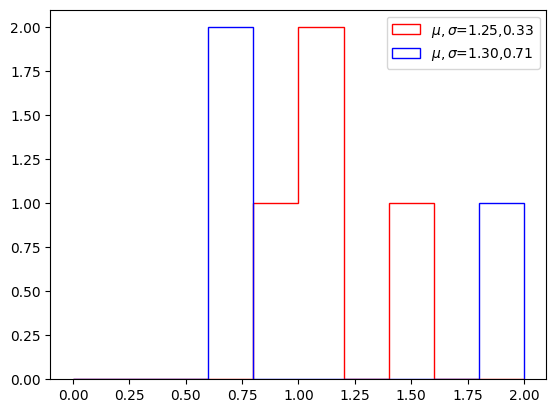

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

mu1 = 1.25
sig1 = np.sqrt(0.11)

mu2 = 1.30
sig2 = np.sqrt(0.50)

N = 4

gauss1 = np.random.normal(loc=mu1, scale=sig1, size=N)
gauss2 = np.random.normal(loc=mu2, scale=sig2, size=N)

n_bins = 10
xmin, xmax = 0, 2

plt.hist(
    gauss1,
    bins=n_bins,
    histtype="step",
    color="red",
    label=f"$\\mu,\sigma$={mu1:.2f},{sig1:.2f}",
    range=(xmin, xmax),
)
plt.hist(
    gauss2,
    bins=n_bins,
    histtype="step",
    color="blue",
    label=f"$\\mu,\sigma$={mu2:.2f},{sig2:.2f}",
    range=(xmin, xmax),
)
plt.legend()
plt.show()

In [13]:
x = np.array([1.01, 1.30, 1.35, 1.44])


def gauss_pdf(x, mu, sig):
    return 1 / (sig * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) ** 2) / (2 * sig**2))


lik1 = np.prod(gauss_pdf(x, mu1, sig1))
lik2 = np.prod(gauss_pdf(x, mu2, sig2))

lik3 = np.prod(gauss_pdf(gauss1, mu1, sig1))
lik4 = np.prod(gauss_pdf(gauss2, mu2, sig2))


print(lik1)
print(lik2)
print(lik3)
print(lik4)

1.2918411137616796
0.09111254560865159
0.32840064125918905
0.052962095784910734


In [82]:
mu3 = 0.2
sig3 = 0.1
N3 = 50

gauss3 = np.random.normal(loc=mu3, scale=sig3, size=N3)

lin_scan = np.linspace(0.1, 0.5, 1000)

mesh = np.array(np.meshgrid(lin_scan, lin_scan)).T.reshape(-1, 2)
mu3_vals = mesh[:, 0]
sig3_vals = mesh[:, 1]
gauss_pdf_mesh = gauss_pdf(
    gauss3[np.newaxis, :], mu3_vals[:, np.newaxis], sig3_vals[:, np.newaxis]
)
log_likelihoods = np.sum(np.log(gauss_pdf_mesh), axis=1)
llh_max_idx = np.argmax(log_likelihoods)
llh_max_val = log_likelihoods[llh_max_idx]
llh_max_sig3 = sig3_vals[llh_max_idx]
llh_max_mu3 = mu3_vals[llh_max_idx]
print(f"Max LLH: {llh_max_val}, sigma: {llh_max_sig3}, mu: {llh_max_mu3}")

Max LLH: 40.39531225186653, sigma: 0.10800800800800801, mu: 0.23653653653653656


In [83]:
LLH_analytical = np.sum(np.log(gauss_pdf(gauss3, mu3, sig3)))
print(f"Analytical LLH: {LLH_analytical}")

Analytical LLH: 36.741531134544076


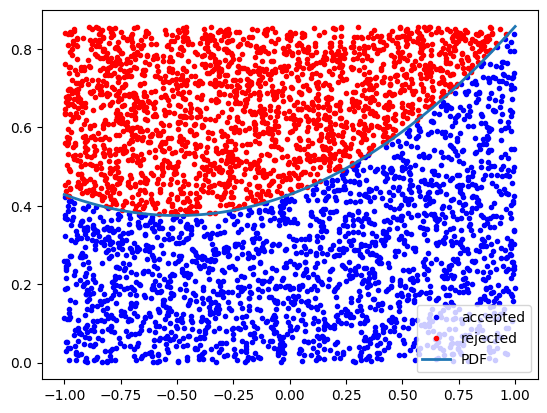

In [165]:
def f_pdf(x, alpha, beta):
    return 3 / (2 * (beta + 3)) * (1 + alpha * x + beta * x**2)


x_min = -1
x_max = 1
# y_min = f_pdf(-1, alpha=0.5, beta=0.5)
y_min = 0
y_max = f_pdf(1, alpha=0.5, beta=0.5)
x = np.random.uniform(x_min, x_max, 50_000)
y = np.random.uniform(y_min, y_max, 50_000)
f_x = f_pdf(x, alpha=0.5, beta=0.5)
x_accepted = x[y < f_x][:2000]
x_rejected = x[y >= f_x][:2000]
y_accepted = y[y < f_x][:2000]
y_rejected = y[y >= f_x][:2000]


n_bins = 35
plt.plot(x_accepted, y_accepted, ".", color="blue", label="accepted")
plt.plot(x_rejected, y_rejected, ".", color="red", label="rejected")
plt.plot(
    np.linspace(-1, 1, 2000),
    f_pdf(np.linspace(-1, 1, 2000), 0.5, 0.5),
    lw=2,
    label="PDF",
)
plt.legend()
plt.show()

In [181]:
def log_LLH_f(args):
    return -np.sum(np.log(f_pdf(x_accepted, args[0], args[1])))


minimizer = minimize(log_LLH_f, x0=(0.5, 0.5))
alpha_fit, beta_fit = minimizer.x
bin_width = 2 / n_bins

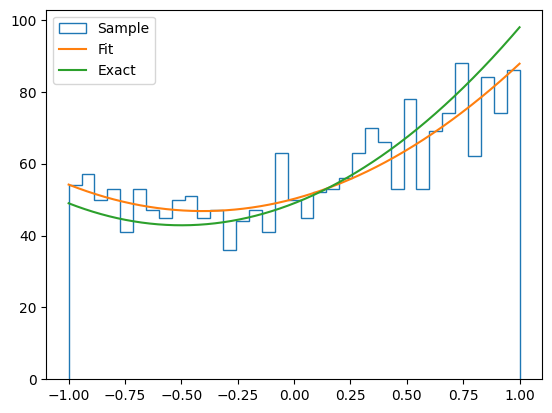

In [186]:
plt.hist(x_accepted, bins=n_bins, range=(-1, 1), histtype="step", label="Sample")
plt.plot(
    np.linspace(-1, 1, 1000),
    2000 * bin_width * f_pdf(np.linspace(-1, 1, 1000), alpha_fit, beta_fit),
    label="Fit",
)
plt.plot(
    np.linspace(-1, 1, 1000),
    2000 * bin_width * f_pdf(np.linspace(-1, 1, 1000), 0.5, 0.5),
    label="Exact",
)
plt.legend()